### **Import Resource**

In [1]:
!pip install tensorflowjs

     |████████████████████████████████| 71kB 5.0MB/s 
     |████████████████████████████████| 112kB 9.9MB/s 
  Found existing installation: tensorflow-hub 0.12.0
    Uninstalling tensorflow-hub-0.12.0:
      Successfully uninstalled tensorflow-hub-0.12.0


In [2]:
import tensorflow as tf
print('TensorFlow :', tf.__version__)

TensorFlow : 2.5.0


In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras_preprocessing import image
from shutil import copyfile
from google.colab import files
from tensorflow.keras.applications.xception import preprocess_input

import zipfile
import matplotlib.pyplot as plt
import numpy as np
import os

### **Mounting Google Drive**



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Dataset Directory**

In [4]:
try:
    os.mkdir('/content/drive/Shareddrives/Capstone Project/batik2/')
    os.mkdir(os.path.join('/content/drive/Shareddrives/Capstone Project/batik2/', 'training'))
    os.mkdir(os.path.join('/content/drive/Shareddrives/Capstone Project/batik2/', 'testing'))
    os.mkdir(os.path.join('/content/drive/Shareddrives/Capstone Project/batik2/training', 'ceplok'))
    os.mkdir(os.path.join('/content/drive/Shareddrives/Capstone Project/batik2/training', 'megamendung'))
    os.mkdir(os.path.join('/content/drive/Shareddrives/Capstone Project/batik2/training', 'kawung'))
    os.mkdir(os.path.join('/content/drive/Shareddrives/Capstone Project/batik2/training', 'parang'))
    os.mkdir(os.path.join('/content/drive/Shareddrives/Capstone Project/batik2/training', 'sidomukti'))
    os.mkdir(os.path.join('/content/drive/Shareddrives/Capstone Project/batik2/testing', 'ceplok'))
    os.mkdir(os.path.join('/content/drive/Shareddrives/Capstone Project/batik2/testing', 'megamendung'))
    os.mkdir(os.path.join('/content/drive/Shareddrives/Capstone Project/batik2/testing', 'kawung'))
    os.mkdir(os.path.join('/content/drive/Shareddrives/Capstone Project/batik2/testing', 'parang'))
    os.mkdir(os.path.join('/content/drive/Shareddrives/Capstone Project/batik2/testing', 'sidomukti'))
except OSError:
    pass

In [5]:
print('Colab3 Ceplok:', len(os.listdir('/content/drive/Shareddrives/Capstone Project/Dataset/Main Dataset/Colab3/Ceplok/')))
print('Colab3 Megamendung:', len(os.listdir('/content/drive/Shareddrives/Capstone Project/Dataset/Main Dataset/Colab3/Megamendung/')))
print('Colab3 Kawung:', len(os.listdir('/content/drive/Shareddrives/Capstone Project/Dataset/Main Dataset/Colab3/Kawung/')))
print('Colab3 Parang:', len(os.listdir('/content/drive/Shareddrives/Capstone Project/Dataset/Main Dataset/Colab3/Parang/')))
print('Colab3 Sidomukti:', len(os.listdir('/content/drive/Shareddrives/Capstone Project/Dataset/Main Dataset/Colab3/Sidomukti/')))

Colab3 Ceplok: 708
Colab3 Megamendung: 560
Colab3 Kawung: 661
Colab3 Parang: 922
Colab3 Sidomukti: 267


### **Split Dataset**

In [6]:
def split_data(SOURCE, TRAINING, TESTING, VALIDATION, SPLIT_SIZE):
    # YOUR CODE STARTS HERE
    if not os.path.exists(TRAINING): 
        os.makedirs(TRAINING) 
                
    if not os.path.exists(TESTING): 
        os.makedirs(TESTING) 

    if not os.path.exists(VALIDATION): 
        os.makedirs(VALIDATION)

    file_names = os.listdir(SOURCE) 
    file_number = len(file_names) 

    for index, file in enumerate(file_names): 
        if index < SPLIT_SIZE * file_number: 
          if index < 0.8 * file_number:
            copyfile(os.path.join(SOURCE, file), os.path.join(TRAINING, file))
          else:
            copyfile(os.path.join(SOURCE, file), os.path.join(VALIDATION, file))
        else: 
            copyfile(os.path.join(SOURCE, file), os.path.join(TESTING, file)) 
        
CEPLOK_SOURCE_DIR = "/content/drive/Shareddrives/Capstone Project/Dataset/Main Dataset/Colab3/Ceplok/"
MEGAMENDUNG_SOURCE_DIR = "/content/drive/Shareddrives/Capstone Project/Dataset/Main Dataset/Colab3/Megamendung/"
KAWUNG_SOURCE_DIR = "/content/drive/Shareddrives/Capstone Project/Dataset/Main Dataset/Colab3/Kawung/"
PARANG_SOURCE_DIR = "/content/drive/Shareddrives/Capstone Project/Dataset/Main Dataset/Colab3/Parang/"
SIDOMUKTI_SOURCE_DIR = "/content/drive/Shareddrives/Capstone Project/Dataset/Main Dataset/Colab3/Sidomukti/"

TRAINING_CEPLOK_DIR = "/content/drive/Shareddrives/Capstone Project/batik2/training/ceplok/"
TRAINING_MEGAMENDUNG_DIR = "/content/drive/Shareddrives/Capstone Project/batik2/training/megamendung/"
TRAINING_KAWUNG_DIR = "/content/drive/Shareddrives/Capstone Project/batik2/training/kawung/"
TRAINING_PARANG_DIR = "/content/drive/Shareddrives/Capstone Project/batik2/training/parang/"
TRAINING_SIDOMUKTI_DIR = "/content/drive/Shareddrives/Capstone Project/batik2/training/sidomukti/"

TESTING_CEPLOK_DIR = "/content/drive/Shareddrives/Capstone Project/batik2/testing/ceplok/"
TESTING_MEGAMENDUNG_DIR = "/content/drive/Shareddrives/Capstone Project/batik2/testing/megamendung/"
TESTING_KAWUNG_DIR = "/content/drive/Shareddrives/Capstone Project/batik2/testing/kawung/"
TESTING_PARANG_DIR = "/content/drive/Shareddrives/Capstone Project/batik2/testing/parang/"
TESTING_SIDOMUKTI_DIR = "/content/drive/Shareddrives/Capstone Project/batik2/testing/sidomukti/"

VALIDATION_CEPLOK_DIR = "/content/drive/Shareddrives/Capstone Project/batik2/validation/ceplok/"
VALIDATION_MEGAMENDUNG_DIR = "/content/drive/Shareddrives/Capstone Project/batik2/validation/megamendung/"
VALIDATION_KAWUNG_DIR = "/content/drive/Shareddrives/Capstone Project/batik2/validation/kawung/"
VALIDATION_PARANG_DIR = "/content/drive/Shareddrives/Capstone Project/batik2/validation/parang/"
VALIDATION_SIDOMUKTI_DIR = "/content/drive/Shareddrives/Capstone Project/batik2/validation/sidomukti/"


split_size = .9
split_data(CEPLOK_SOURCE_DIR, TRAINING_CEPLOK_DIR, TESTING_CEPLOK_DIR, VALIDATION_CEPLOK_DIR, split_size)
split_data(MEGAMENDUNG_SOURCE_DIR, TRAINING_MEGAMENDUNG_DIR, TESTING_MEGAMENDUNG_DIR, VALIDATION_MEGAMENDUNG_DIR, split_size)
split_data(KAWUNG_SOURCE_DIR, TRAINING_KAWUNG_DIR, TESTING_KAWUNG_DIR, VALIDATION_KAWUNG_DIR, split_size)
split_data(PARANG_SOURCE_DIR, TRAINING_PARANG_DIR, TESTING_PARANG_DIR, VALIDATION_PARANG_DIR, split_size)
split_data(SIDOMUKTI_SOURCE_DIR, TRAINING_SIDOMUKTI_DIR, TESTING_SIDOMUKTI_DIR, VALIDATION_SIDOMUKTI_DIR, split_size)

In [7]:
train_ceplok = os.listdir(TRAINING_CEPLOK_DIR)
train_megamendung = os.listdir(TRAINING_MEGAMENDUNG_DIR)
train_kawung = os.listdir(TRAINING_KAWUNG_DIR)
train_parang = os.listdir(TRAINING_PARANG_DIR)
train_sidomukti = os.listdir(TRAINING_SIDOMUKTI_DIR)

test_ceplok = os.listdir(TESTING_CEPLOK_DIR)
test_megamendung = os.listdir(TESTING_MEGAMENDUNG_DIR)
test_kawung = os.listdir(TESTING_KAWUNG_DIR)
test_parang = os.listdir(TESTING_PARANG_DIR)
test_sidomukti = os.listdir(TESTING_SIDOMUKTI_DIR)

val_ceplok = os.listdir(VALIDATION_CEPLOK_DIR)
val_megamendung = os.listdir(VALIDATION_MEGAMENDUNG_DIR)
val_kawung = os.listdir(VALIDATION_KAWUNG_DIR)
val_parang = os.listdir(VALIDATION_PARANG_DIR)
val_sidomukti = os.listdir(VALIDATION_SIDOMUKTI_DIR)

print("Training")
print('Ceplok :', len(train_ceplok))
print('Megamendung :', len(train_megamendung))
print('Kawung :', len(train_kawung))
print('Parang :', len(train_parang))
print('Sidomukti :', len(train_sidomukti))

print("\nTesting")
print('Ceplok :', len(test_ceplok))
print('Megamendung :', len(test_megamendung))
print('Kawung :', len(test_kawung))
print('Parang :', len(test_parang))
print('Sidomukti :', len(test_sidomukti))

print("\nValidation")
print('Ceplok :', len(val_ceplok))
print('Megamendung :', len(val_megamendung))
print('Kawung :', len(val_kawung))
print('Parang :', len(val_parang))
print('Sidomukti :', len(val_sidomukti))


Training
Ceplok : 567
Megamendung : 448
Kawung : 529
Parang : 738
Sidomukti : 214

Testing
Ceplok : 70
Megamendung : 56
Kawung : 66
Parang : 92
Sidomukti : 26

Validation
Ceplok : 71
Megamendung : 56
Kawung : 66
Parang : 92
Sidomukti : 27


In [46]:
BATCH_SIZE = 32
IMG_SIZE = (224, 224)

TRAINING_DIR = '/content/drive/Shareddrives/Capstone Project/batik2/training/'
train_datagen = image.ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=45,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=0.25,
    zoom_range=0.25,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR, 
    class_mode='categorical', 
    batch_size=BATCH_SIZE, 
    target_size=IMG_SIZE, 
    shuffle=True
)


TESTING_DIR = '/content/drive/Shareddrives/Capstone Project/batik2/testing/'
datagen = image.ImageDataGenerator(rescale = 1.0/255.0)

test_generator = datagen.flow_from_directory(
    TESTING_DIR, 
    class_mode='categorical', 
    batch_size=BATCH_SIZE, 
    target_size=IMG_SIZE,
    shuffle=False
)


VALIDATION_DIR = '/content/drive/Shareddrives/Capstone Project/batik2/validation/'
val_generator = datagen.flow_from_directory(
    VALIDATION_DIR, 
    class_mode='categorical', 
    batch_size=BATCH_SIZE, 
    target_size=IMG_SIZE,
    shuffle=True
)


Found 2496 images belonging to 5 classes.
Found 310 images belonging to 5 classes.
Found 312 images belonging to 5 classes.


In [47]:
train_dataset = image_dataset_from_directory(TRAINING_DIR,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

Found 2496 files belonging to 5 classes.


In [48]:
class_names = train_dataset.class_names

print(class_names)

['ceplok', 'kawung', 'megamendung', 'parang', 'sidomukti']


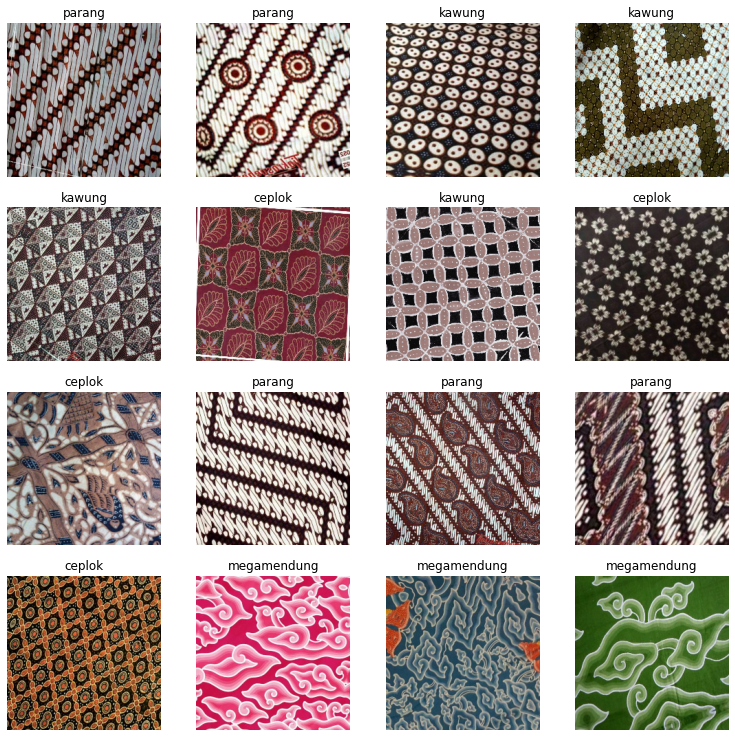

In [49]:
plt.figure(figsize=(13, 13))
for images, labels in train_dataset.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### **Simple CNN**

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=IMG_SIZE + (3,)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Using dropouts
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.summary()

In [ ]:
learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    epochs=10,
                    steps_per_epoch=len(train_generator),
                    validation_data=val_generator,
                    verbose = 1,
                    validation_steps=len(val_generator))

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


### **Train Model with Transfer Learning**

In [134]:
pretrained_model = InceptionV3(input_shape = (224, 224, 3),
                                include_top = False,
                                weights = 'imagenet')

In [135]:
for layer in pretrained_model.layers:
    layer.trainable = False
    
# Print the model summary
#pretrained_model.summary()

In [136]:
last_layer = pretrained_model.get_layer('mixed5')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 12, 12, 768)


In [137]:
#model2 = tf.keras.Sequential([
#  pretrained_model,
#  tf.keras.layers.Flatten(),
#  tf.keras.layers.Dense(512, activation='relu'),
#  tf.keras.layers.Dropout(0.2),
#  tf.keras.layers.Dense(5, activation='softmax')
#])


In [138]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense(5, activation='softmax')(x)           

In [139]:
model2 = Model(pretrained_model.input, x) 

In [140]:
model2.compile(optimizer=tf.keras.optimizers.Adam(0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model2.summary()

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_940 (Conv2D)             (None, 111, 111, 32) 864         input_11[0][0]                   
__________________________________________________________________________________________________
batch_normalization_940 (BatchN (None, 111, 111, 32) 96          conv2d_940[0][0]                 
__________________________________________________________________________________________________
activation_940 (Activation)     (None, 111, 111, 32) 0           batch_normalization_940[0][0]    
___________________________________________________________________________________________

In [141]:
history = model2.fit(train_generator, 
                     epochs=20, 
                     steps_per_epoch=10, 
                     validation_data=val_generator, 
                     validation_steps=3,
                     verbose=1)

Epoch 1/20
10/10 [==============================] - 33s 3s/step - loss: 3.9526 - accuracy: 0.3656 - val_loss: 1.2377 - val_accuracy: 0.5521
Epoch 2/20
10/10 [==============================] - 8s 864ms/step - loss: 1.1802 - accuracy: 0.6094 - val_loss: 1.7509 - val_accuracy: 0.5625
Epoch 3/20
10/10 [==============================] - 8s 826ms/step - loss: 0.8094 - accuracy: 0.6812 - val_loss: 1.0154 - val_accuracy: 0.7083
Epoch 4/20
10/10 [==============================] - 8s 820ms/step - loss: 0.5733 - accuracy: 0.7844 - val_loss: 1.1372 - val_accuracy: 0.6771
Epoch 5/20
10/10 [==============================] - 9s 881ms/step - loss: 0.4713 - accuracy: 0.8219 - val_loss: 1.2124 - val_accuracy: 0.6771
Epoch 6/20
10/10 [==============================] - 9s 860ms/step - loss: 0.4839 - accuracy: 0.8000 - val_loss: 1.2363 - val_accuracy: 0.6354
Epoch 7/20
10/10 [==============================] - 8s 829ms/step - loss: 0.4879 - accuracy: 0.8156 - val_loss: 1.0530 - val_accuracy: 0.5938
Epoch 8/

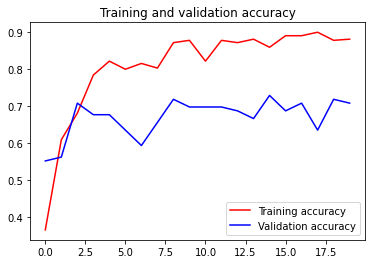

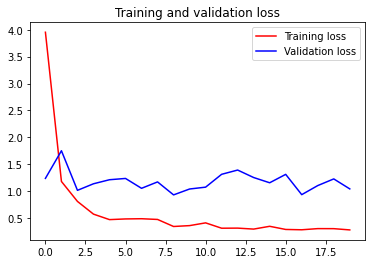

In [142]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [143]:
loss = model2.evaluate(test_generator, steps=10)

10/10 [==============================] - 12s 1s/step - loss: 0.4499 - accuracy: 0.8452


Saving Sidomukti_0_1313.jpg to Sidomukti_0_1313.jpg
Saving parang_0_10.jpg to parang_0_10.jpg
Saving megamendung_0_1045.jpg to megamendung_0_1045.jpg
Saving kawung_0_1.jpg to kawung_0_1.jpg
Saving ceplok_0_1024.jpg to ceplok_0_1024.jpg


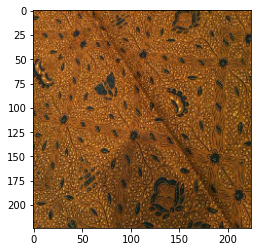

ceplok: 3.74%
kawung: 2.27%
megamendung: 0.00%
parang: 0.50%
sidomukti: 93.49%


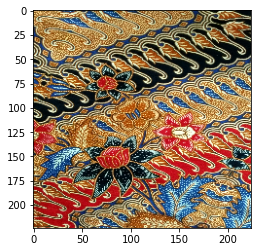

ceplok: 2.47%
kawung: 0.18%
megamendung: 1.11%
parang: 96.23%
sidomukti: 0.02%


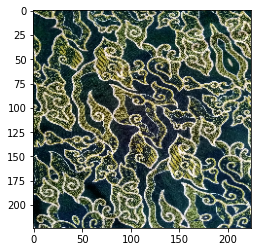

ceplok: 2.56%
kawung: 0.20%
megamendung: 96.27%
parang: 0.66%
sidomukti: 0.31%


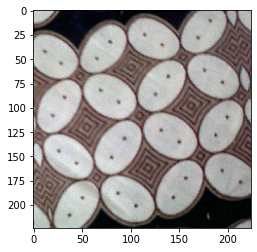

ceplok: 0.00%
kawung: 100.00%
megamendung: 0.00%
parang: 0.00%
sidomukti: 0.00%


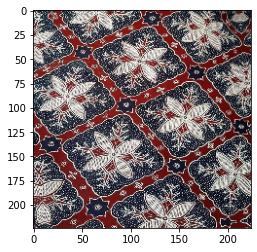

ceplok: 78.54%
kawung: 4.87%
megamendung: 0.02%
parang: 0.70%
sidomukti: 15.87%


In [144]:
labels = train_generator.class_indices.keys()
uploaded = files.upload()

for paths in uploaded.keys():
 
  # predicting images
  path = paths
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  images = np.vstack([x])
  proba = model2.predict(images)[0]
  plt.imshow(img)
  plt.show()
  for (label, p) in zip(labels, proba):
    print("{}: {:.2f}%".format(label, p * 100))

### **Save the Model**

In [158]:
saved_model_path = "/content/best_model.h5"

# Save model h5
model2.save(saved_model_path)

### **Convert Saved Model to Tensorflow.js** 

In [169]:
!tensorflowjs_converter --input_format=keras {saved_model_path} '/content/drive/MyDrive/best_model_fix'

2021-05-30 03:17:54.899069: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [155]:
#local_zip = '/content/naratik_best_model.zip'

#naratik_best_model = zipfile.ZipFile(local_zip, 'r')

#naratik_best_model.extractall('/tmp')
#naratik_best_model.close()

In [156]:
#naratik_best_model.summary()